In [165]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Import dataset avec exclusion header & footer

In [155]:
df = pd.read_excel('DATABASE.xls', index_col=0, skiprows=[0,1,2], skipfooter=42)  

## Renommage colonnes

In [156]:
# Rename columns
df = df.rename(columns={'Sender c': 'Sender1', 
                        'Sender 2c': 'Sender2', 
                        'Sender 3c': 'Sender3', 
                        'Targetd': 'Target',
                        'US casee': 'US_case', 
                        'US unilateral casef': 'US_unilateral_case', 
                        'Foreign policy goal categoryg': 'Goal_categ', 
                        'First yearh': 'First_year',
                        'Last yeari': 'Last_year', 
                        'Policy resultj': 'Policy_result', 
                        'Sanctions contributionk': 'Sanctions_contrib',
                        'Success \nscorel': 'Success_score', 
                        'Companion policiesm': 'Comp_policies', 
                        'International cooperationn':'Int_coop', 
                        'International assistanceo': 'Int_assistance', 
                        'Cooperating international organizationp': 'Coop_int_org',
                        'International organization senderq': 'Int_org_sender', 
                        'International organization sender & target membersr': 'Int_org_sender_&_target_members', 
                        'Length (years)s': 'Length_years',
                        'Prior relationst': 'Prior_relations', 
                        'Regime Type \n(DEMOC 1st year)u': 'Regime_type', 
                        'Regime Type2 (Polity2 1st year)v': 'Regime_type2', 
                        'Regime Type3 \n(Scale 1st year)w': 'Regime_type3',
                        'Political stability priorx': 'Political_stability_prior', 
                        'Political stability duringy': 'Political_stability_during',
                        'Cost to targetz': 'Cost_to_target', 
                        'Cost to target (percent of GNP)aa': 'Cost_to_target_%GNP',
                        'Cost to target per capitabb': 'Cost_to_target_per_capita', 
                        'Trade linkagecc': 'Trade_linkage', 
                        'GNP \nratiodd': 'GNP_ratio',
                        'Health and stabilityee': 'Health_&_stability', 
                        'Sanction typeff': 'Sanction_type', 
                        'Cost to sendergg': 'Cost_to_sender',
                        'GDP growth (percent, 5-year average)hh': 'GDP_growth%5years_average', 
                        'Inflation (percent,\n 3-year average)ii':'Inflation%3years_average', 
                        'Target International Monetary Fund codejj': 'Target_int_monetary_code', 
                        'Country groupkk': 'Country_group'
                       })
# rename index
df.index.names = ['id_case']

In [157]:
#  list categ variables
list(df.select_dtypes(include=['object']).columns)

['Sender1',
 'Sender2',
 'Sender3',
 'Target',
 'Goal',
 'Last_year',
 'Comp_policies',
 'Int_assistance',
 'Coop_int_org',
 'Regime_type',
 'Regime_type2',
 'Regime_type3',
 'Political_stability_prior',
 'Political_stability_during',
 'Cost_to_target',
 'Cost_to_target_%GNP',
 'Cost_to_target_per_capita',
 'Trade_linkage',
 'Sanction_type',
 'GDP_growth%5years_average',
 'Inflation%3years_average',
 'Target_int_monetary_code']

In [158]:
#  list quantiv variables
# df_quant = df.select_dtypes(include=['int','float64'])
list(df.select_dtypes(include=['int','float64']).columns)
# df_quant.describe()

['US_case',
 'US_unilateral_case',
 'Goal_categ',
 'First_year',
 'Policy_result',
 'Sanctions_contrib',
 'Success_score',
 'Int_coop',
 'Int_org_sender',
 'Int_org_sender_&_target_members',
 'Length_years',
 'Prior_relations',
 'GNP_ratio',
 'Health_&_stability',
 'Cost_to_sender',
 'Country_group']

## Valeurs manquantes

In [159]:
# df.isna().sum()  

### Colones Cost to target - Cost to target (percent of GNP) - Cost to target per capita   
Remplacement des '--' en 0 et après converion en numérique

In [160]:
df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].head()

,Cost_to_target_%GNP,Cost_to_target,Cost_to_target_per_capita
id_case,,,
14-1,7.1,843,12.58
17-1,0.8,23,0.44
18-1,4.1,446,2.49
21-1,--,--,--
25-1,--,--,--


In [161]:
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].astype('str')
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].str.replace('--', '0')
df['Cost_to_target_%GNP'] = pd.to_numeric(df['Cost_to_target_%GNP'])

df['Cost_to_target'] = df['Cost_to_target'].astype('str')
df['Cost_to_target'] = df['Cost_to_target'].str.replace('--', '0')
df['Cost_to_target'] = pd.to_numeric(df['Cost_to_target'])

df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].astype('str')
df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].str.replace('--', '0')
df['Cost_to_target_per_capita'] = pd.to_numeric(df['Cost_to_target_per_capita'])

In [162]:
df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].head()

,Cost_to_target_%GNP,Cost_to_target,Cost_to_target_per_capita
id_case,,,
14-1,7.1,843.0,12.58
17-1,0.8,23.0,0.44
18-1,4.1,446.0,2.49
21-1,0.0,0.0,0.00
25-1,0.0,0.0,0.00


In [163]:
df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].dtypes

Cost_to_target_%GNP          float64
Cost_to_target               float64
Cost_to_target_per_capita    float64
dtype: object

### Colonnes "GDP growth (percent, 5-year average) ", "Inflation": - remplacement des n.a. par NaN

In [164]:
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].astype('str')
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].str.replace('n.a.', '')
df['GDP_growth%5years_average'] = pd.to_numeric(df['GDP_growth%5years_average'])

df['GDP_growth%5years_average'].head()
# df['GDP_growth%5years_average'].dtypes
# df['GDP_growth%5years_average'].isna().sum()

id_case
14-1    3.58
17-1    5.40
18-1     NaN
21-1   -1.50
25-1    3.30
Name: GDP_growth%5years_average, dtype: float64

### Colonne "Comp_policies"
Suppression de la virgule  
'--' restent tels quels

In [110]:
df['Comp_policies'] = df['Comp_policies'].str.replace(',', '')
df['Comp_policies'].head()

id_case
14-1     R
17-1    --
18-1    RQ
21-1    --
25-1    --
Name: Comp_policies, dtype: object

## Visualisation Auteurs de sanctions

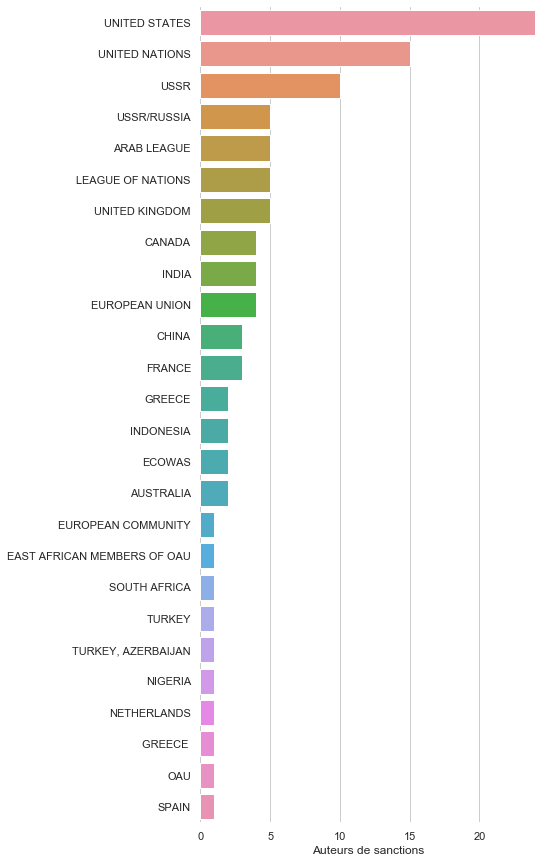

In [176]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Sender1'].value_counts(), y=df['Sender1'].value_counts().index)

# Add a legend and informative axis label
ax.set(xlim=(0, 24), ylabel="", xlabel="Auteurs de sanctions")
sns.despine(left=True, bottom=True)

## Visualisation Goals

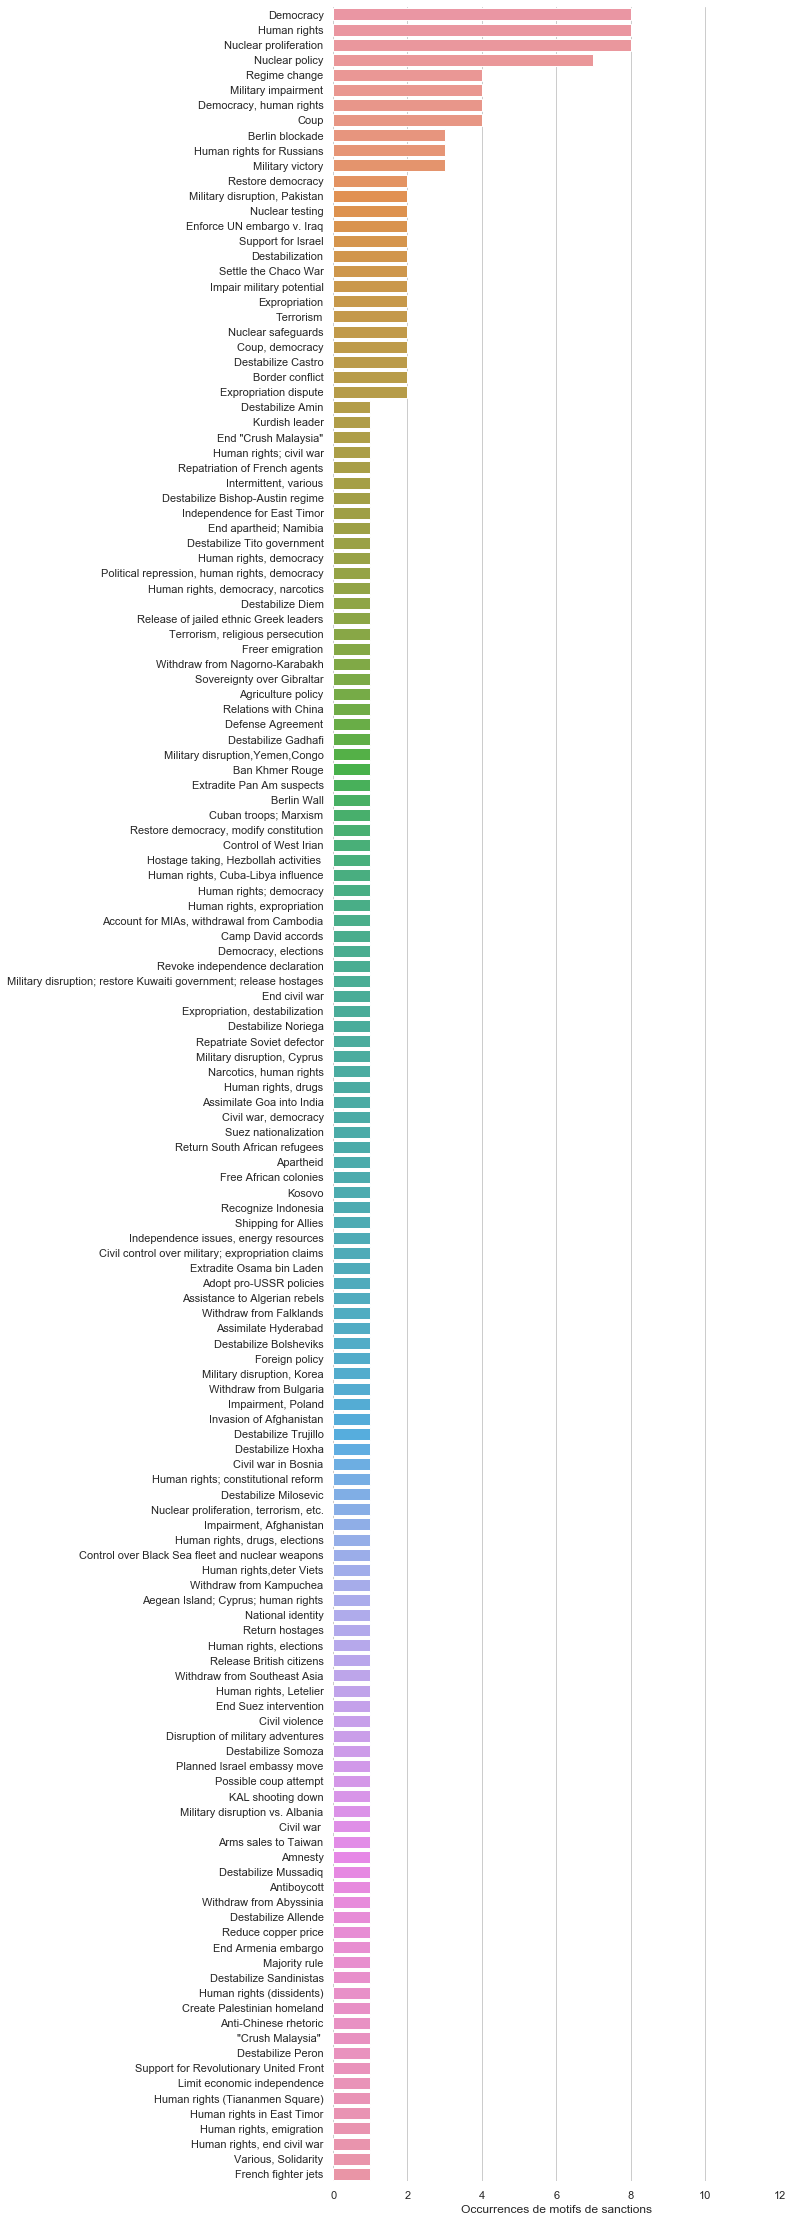

In [192]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 40))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Goal'].value_counts(), y=df['Goal'].value_counts().index)

# Add a legend and informative axis label
ax.set(xlim=(0, 12), ylabel="", xlabel="Occurrences de motifs de sanctions")
sns.despine(left=True, bottom=True)

## Caractéristiques Pays sanctionnés

In [207]:
df_costs = df[['Target', 'Cost_to_target']].groupby(['Target']).mean().sort_values(by='Cost_to_target', ascending=False)
df_costs.head()

,Cost_to_target
Target,
"IRAQ, prewar",18800.0
"IRAQ, postwar",15400.0
"UNITED STATES, (NETHERLANDS)",3217.0
"(UNITED STATES), NETHERLANDS",2681.0
UKRAINE,1430.0


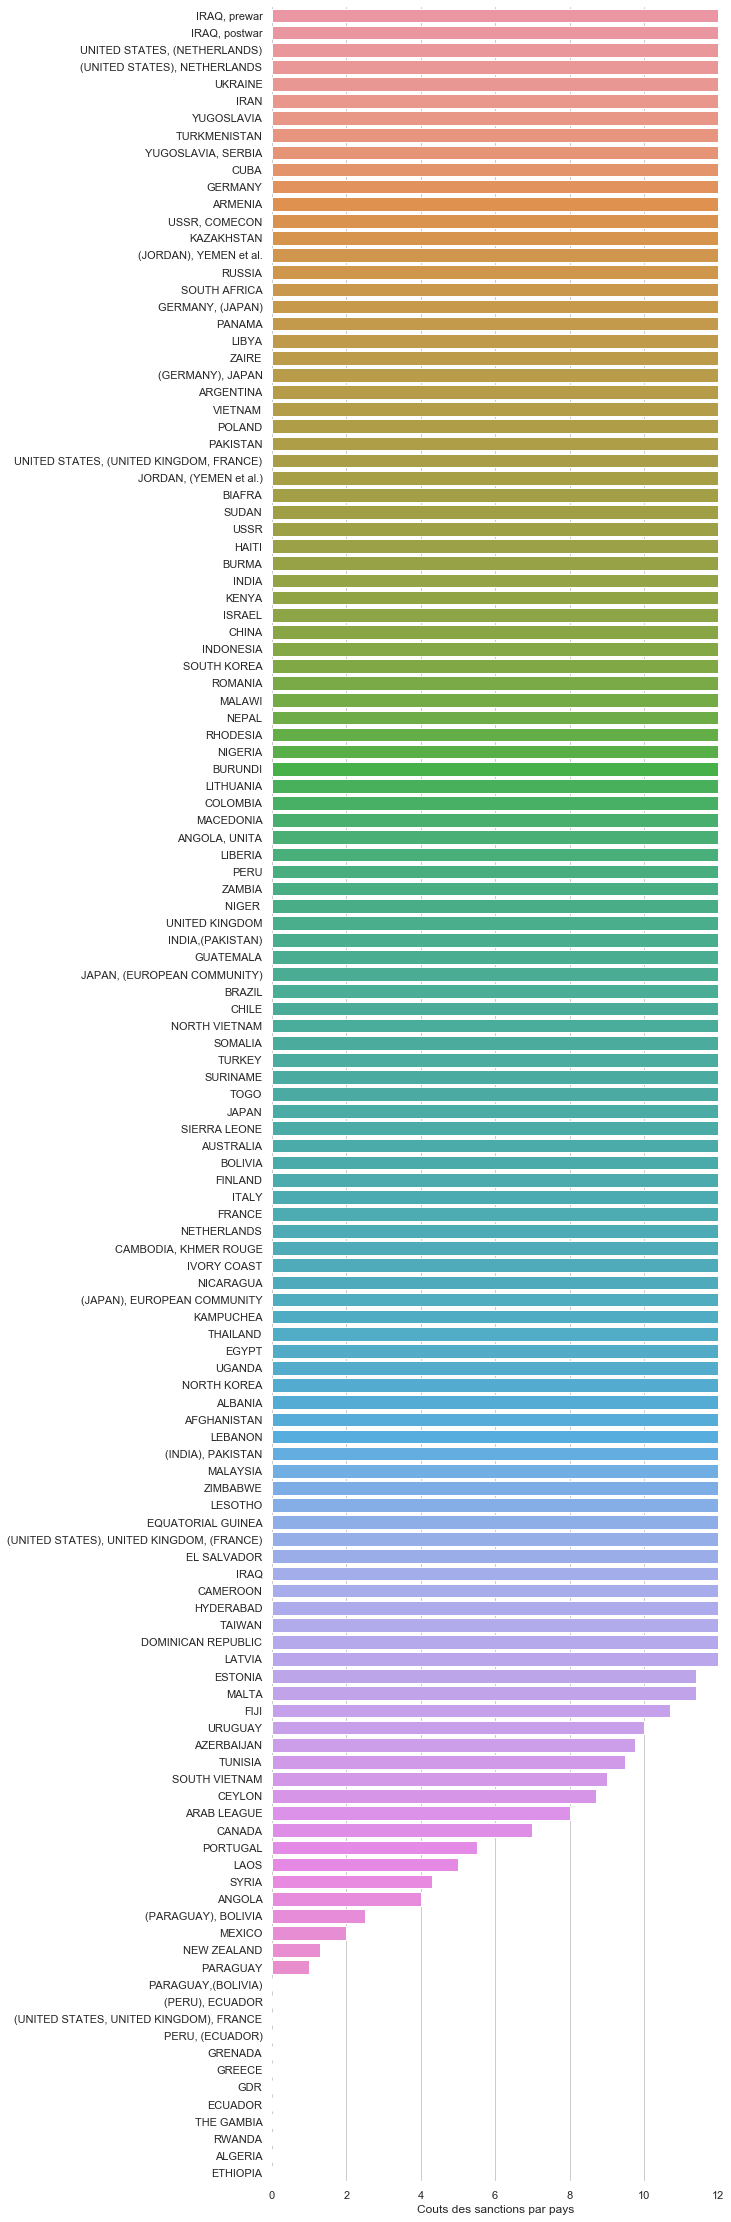

In [212]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 40))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df_costs.Cost_to_target, y=df_costs.index)

# Add a legend and informative axis label
ax.set(xlim=(0, 12), ylabel="", xlabel="Couts des sanctions par pays")
sns.despine(left=True, bottom=True)